## Package
---

In [1]:
# utils
import sys
import time
import scipy
import logging
import numpy as np
import pandas as pd
from collections import Counter

# scRBA
import anndata
import scanpy as sc
from sklearn.metrics.cluster import normalized_mutual_info_score


%load_ext autoreload
%autoreload 2

In [2]:
from pipeline import dl, pp, cl, pl, utils
import gc


## Data Loading & Preprocessing

In [3]:
import anndata
adata = dl.load_data('/projects/zhanglab/users/johnson/data/HumanEmbryonicLimbCell.h5ad')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,subset=True)

import gc
gc.collect()
adata

load:  /projects/zhanglab/users/johnson/data/HumanEmbryonicLimbCell.h5ad
n_obs × n_vars:  (125955, 26252)
running time:  0.00025272369384765625


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


AnnData object with n_obs × n_vars = 125955 × 2358
    obs: 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'region', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells_by

In [4]:
adata.obs['cell_type']

AAACCTGCACATTTCT-5386STDY7537944           mesenchymal cell
AAACCTGCAGGGATTG-5386STDY7537944                 osteoblast
AAACCTGCATCGGGTC-5386STDY7537944           mesenchymal cell
AAACCTGCATGGGACA-5386STDY7537944           mesenchymal cell
AAACCTGGTGATGCCC-5386STDY7537944      vein endothelial cell
                                              ...          
TTTGTCAAGATAGGAG-WSSS_THYst9384958         mesenchymal cell
TTTGTCACATATGCTG-WSSS_THYst9384958         mesenchymal cell
TTTGTCAGTGATGCCC-WSSS_THYst9384958         mesenchymal cell
TTTGTCAGTGCACCAC-WSSS_THYst9384958         mesenchymal cell
TTTGTCATCATTATCC-WSSS_THYst9384958         mesenchymal cell
Name: cell_type, Length: 125955, dtype: category
Categories (38, object): ['common myeloid progenitor', 'myoblast', 'fibroblast', 'chondroblast', ..., 'mesenchymal cell', 'endothelial cell of artery', 'articular chondrocyte', 'muscle fibroblast']

In [17]:
target = 'cell_type'
adata, celltypes = dl.filter_top_k_clusters(adata, target, k = 20)
dl.label_encode(adata, target)
gc.collect()
adata

#k: 18


/home/yenhsian/ScClusterMetric/experiments/pipeline/dl.py:66: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['label'] = labels


AnnData object with n_obs × n_vars = 139945 × 33138
    obs: 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'nCount_RNA', 'nFeature_RNA', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'label'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',

In [18]:
for size in [5, 7, 10]:
    for trial in range(3):
        
    
        print(f'[{trial}]')
        write_path = f'/projects/zhanglab/users/david/data/{size}K/GorillaMiddleTemporalGyrus_{size}K_t{trial}.h5ad'
    
        data = utils.sample_adata(adata, 200, size*1000)
        
        # pca
        sc.tl.pca(data, svd_solver="arpack") # N x D -> N x K
        
        # # pcoa
        # for metric in ['l1','l2','cosine','correlation']:
        #     print(f'[{metric}]')
        #     data = cl.compute_distance_matrix(data, metric, verbose = True) # N x X
        #     data = cl.compute_pcoa(data, metric, 50, verbose = True) # N x K
        
        data.write(write_path)
    
        data = None
        gc.collect()


[0]
[1]
[2]
[0]
[1]
[2]
[0]
[1]
[2]


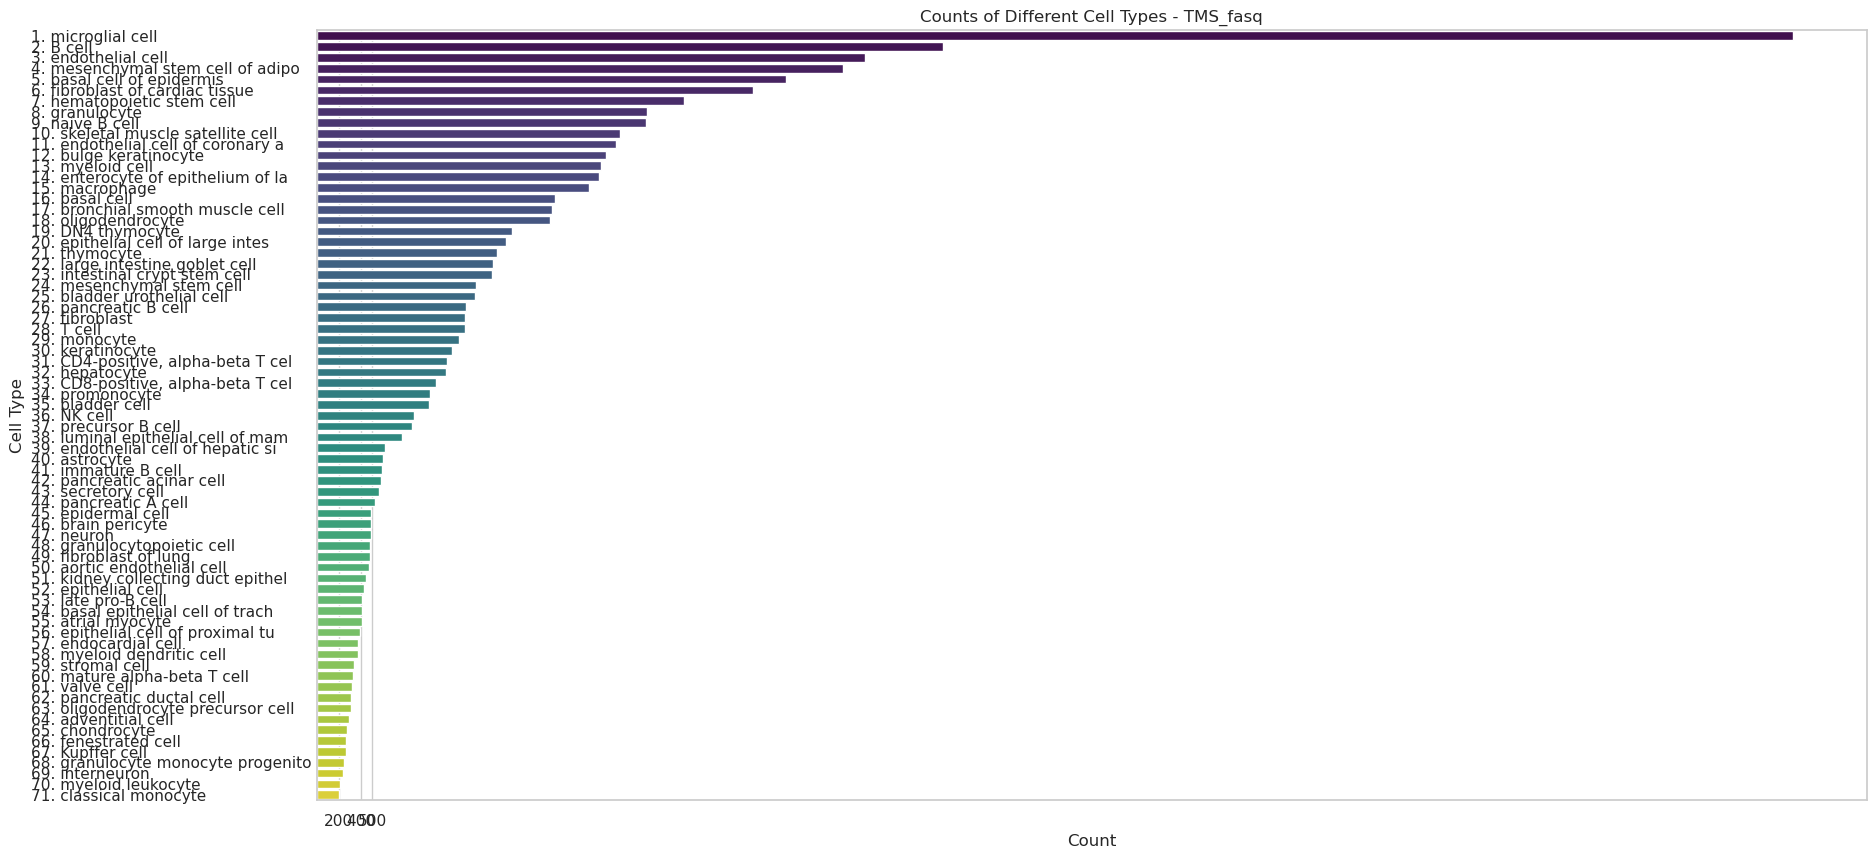

In [14]:
target = 'cell_ontology_class'
pl.plot_cell_types(adata, target)

In [15]:
adata, celltypes = dl.filter_top_k_clusters(adata, target, k = 25)
celltypes

#k: 25


Counter({'microglial cell': 13268,
         'B cell': 5629,
         'endothelial cell': 4928,
         'mesenchymal stem cell of adipose': 4733,
         'basal cell of epidermis': 4214,
         'fibroblast of cardiac tissue': 3926,
         'hematopoietic stem cell': 3306,
         'granulocyte': 2966,
         'naive B cell': 2959,
         'skeletal muscle satellite cell': 2725,
         'endothelial cell of coronary artery': 2694,
         'bulge keratinocyte': 2604,
         'myeloid cell': 2556,
         'enterocyte of epithelium of large intestine': 2542,
         'macrophage': 2447,
         'basal cell': 2139,
         'bronchial smooth muscle cell': 2117,
         'oligodendrocyte': 2094,
         'DN4 thymocyte': 1756,
         'epithelial cell of large intestine': 1704,
         'thymocyte': 1625,
         'large intestine goblet cell': 1587,
         'intestinal crypt stem cell': 1579,
         'mesenchymal stem cell': 1429,
         'bladder urothelial cell': 1420})

### subsample data (min 200 cells)

In [6]:
data = utils.sample_adata(adata, 0, 200)
data

AnnData object with n_obs × n_vars = 200 × 2844
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'label'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

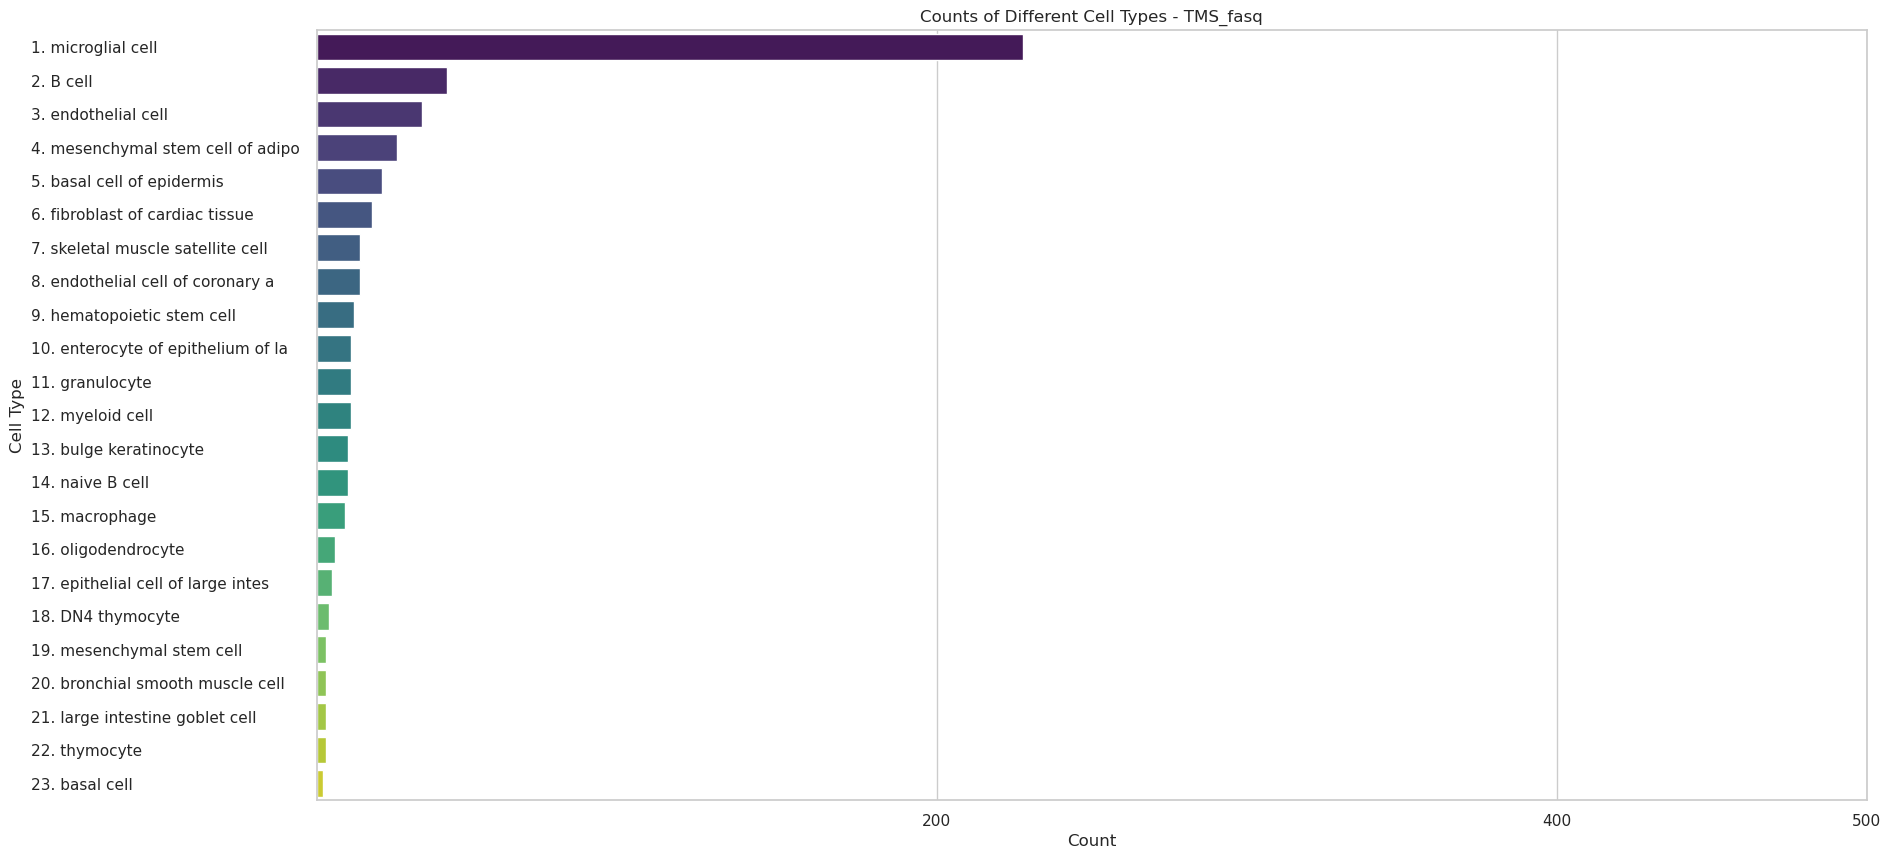

In [18]:
pl.plot_cell_types(data, target)

Laplacian E

In [ ]:
from sklearn.manifold import SpectralEmbedding

def compute_laplacian_eigenmaps_from_graph(adjacency_matrix, n_components=50, verbose=False):
    """
    Computes Laplacian Eigenmaps embedding using a precomputed adjacency matrix (KNN graph).

    Parameters:
        adjacency_matrix (numpy.ndarray): Precomputed adjacency matrix (KNN graph).
        n_components (int): Number of dimensions in the embedded space.
        verbose (bool): If True, print additional info.

    Returns:
        numpy.ndarray: The embedded coordinates.
    """
    if 'time' not in data.uns:
        data.uns['time'] = {}
    
    start_time = time.time()
    embedding = SpectralEmbedding(n_components=n_components, affinity='precomputed')
    coordinates = embedding.fit_transform(adjacency_matrix)

    # write
    data.obsm[f'X_le_{metric}'] = coordinates
    data.uns['time'][f'le_{metric}'] = time.time() - start_time
    
    if verbose:
        print(f'Laplacian Eigenmaps completed, shape: {coordinates.shape}, time taken: {time.time() - start_time}s')

    return coordinates

Isomap

In [9]:

def compute_isomap(data, metric='l2', n_components=50, verbose=False):
    """
    Compute Isomap embedding for an AnnData object using a specified distance metric.

    Parameters:
        data (AnnData): Annotated data matrix.
        metric (str): Metric used for KNN graph.
        n_components (int): Number of components to retain.
        verbose (bool): Print details if True.

    Returns:
        AnnData: Updated AnnData object with Isomap results added.
    """
    if 'time' not in data.uns:
        data.uns['time'] = {}
        
    start_time = time.time()

    # Compute KNN graph using Scanpy
    sc.pp.neighbors(data, n_neighbors = 10, metric = metric, use_rep = 'X', key_added = f'KNN_{metric}')

    # Compute shortest paths from the distance matrix in the KNN graph
    shortest_paths = shortest_path(data.obsp['distances'], directed=False)
    
    # Perform PCoA on the shortest path distance matrix
    coordinates, eigvals = pcoa(shortest_paths, n_components)

    # Store the results in the AnnData object
    data.obsm[f'X_isomap_{metric}'] = coordinates
    data.uns['isomap'] = {f'{metric}_eigvals': eigvals}
    data.uns['time'][f'isomap_{metric}'] = time.time() - start_time

    if verbose:
        print(f'Isomap: {coordinates.shape}, running time: {time.time() - start_time}')

    return data

metric = 'l1'
sc.pp.neighbors(data, n_neighbors = 10, metric = metric, use_rep = 'X', key_added = f'KNN_{metric}')
data

/home/chunchua/miniconda3/envs/lab/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 200 × 2844
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'label'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'KNN_l1'
    obsp: 'KNN_l1_distances', 'KNN_l1_connectivities'

In [20]:
data.obsp['KNN_l1_distances'][:4,:4].toarray()

array([[  0.        , 358.10667183,   0.        ,   0.        ],
       [358.10667183,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

LLE

## PCA & PCoA

In [16]:
write_path = '/projects/zhanglab/users/david/data/DR_imbalance/TMS_facs_30K.h5ad'

# pca
sc.tl.pca(data, svd_solver="arpack") # N x D -> N x K

# pcoa
for metric in ['l1','l2','cosine','correlation']:
    print(f'[{metric}]')
    data = cl.compute_distance_matrix(data, metric, verbose = True) # N x X
    data = cl.compute_pcoa(data, metric, 50, verbose = True) # N x K
    data.write(write_path)

data.write(write_path)

[l1]
dm: (30000, 30000), running time: 1390.2689001560211
pcoa: (30000, 50), running time: 1006.0396211147308
[l2]
dm: (30000, 30000), running time: 1338.7679905891418
pcoa: (30000, 50), running time: 889.5372114181519
[cosine]
dm: (30000, 30000), running time: 1806.6433358192444
dm: (30000, 30000), running time: 1598.4623227119446
pcoa: (30000, 50), running time: 1336.5418417453766


### KNN

In [140]:
## KNN
sc.pp.neighbors(data, n_neighbors = 10, metric = 'correlation', use_rep = 'X_pcoa', key_added = 'neighbors_pcoa')
## Leiden
sc.tl.leiden(data, resolution = 0.3, neighbors_key = 'neighbors_pcoa', key_added  = 'leiden_pcoa')
normalized_mutual_info_score(data.obs['label_2'], data.obs['leiden_pcoa'])

0.9444014966872378